In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [12]:
data = pd.read_excel('Rubella.xlsx', index=False)
# data = data[['sample_id', 'data_1', 'Cutoff ', 'data_2', 'Cutoff .1']]
# ## set column names
# data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

data.columns

Index(['sample_id', 'data_1', 'od_1', 'result_1', 'data_2', 'od_2',
       'result_2'],
      dtype='object')

In [13]:
data.head(10)
data = data.drop(data.index[:8])


In [14]:
data.duplicated().sum()

0

In [15]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

In [17]:
data.head()

,sample_id,data_1,od_1,result_1,data_2,od_2,result_2
8,16V0090604,0.32,0.192,NEGATIVE,0.76,0.740,EQUIVOCAL
9,16V0090660,0.32,1.012,Positive,0.76,1.258,Positive
10,16V0090346,0.32,1.229,Positive,0.76,1.427,Positive
11,16V0090865,0.32,0.837,Positive,0.76,1.225,Positive
12,16V0090867,0.32,0.813,Positive,0.76,1.112,Positive


In [18]:
data.describe()

,data_1,od_1,data_2,od_2
count,136.000000,136.000000,136.000000,136.000000
mean,0.292729,0.690971,0.820588,1.189235
std,0.053163,0.339269,0.145311,0.412910
min,0.194000,0.017000,0.620000,0.037000
25%,0.283800,0.441750,0.620000,1.024750
50%,0.322000,0.681000,0.810000,1.264000
75%,0.330000,0.985250,0.940000,1.467250
max,0.330000,1.405000,0.980000,1.876000


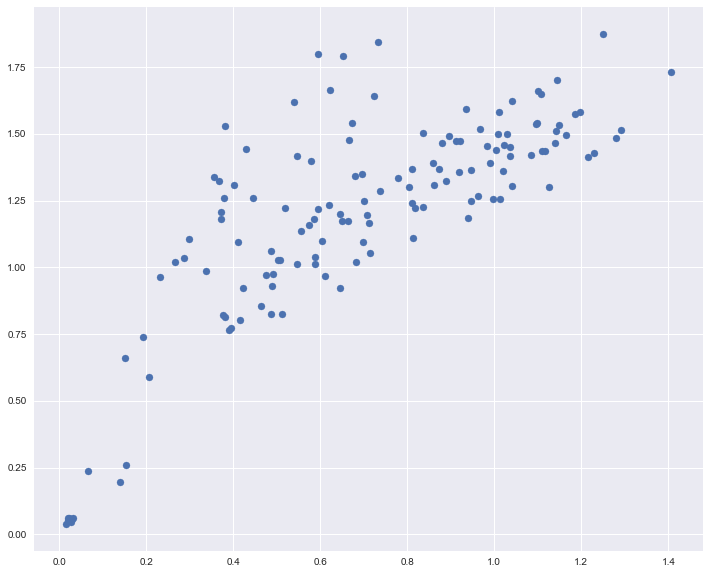

In [31]:
plt.scatter(data.od_1, data.od_2)
plt.show()

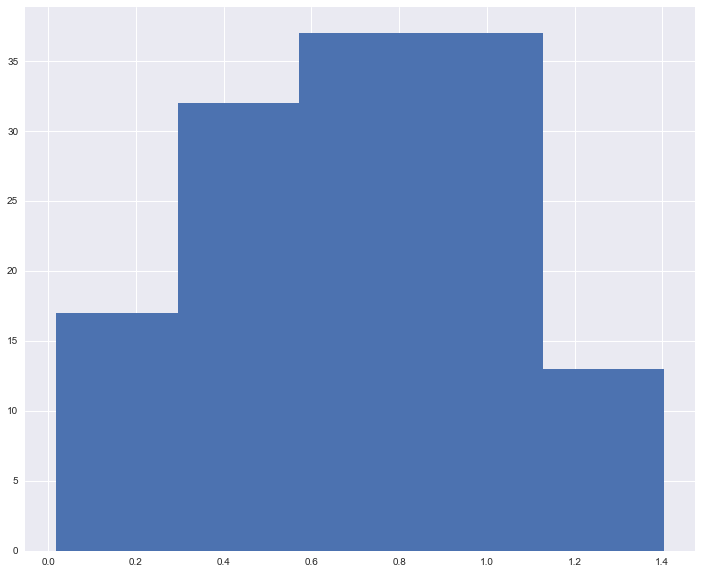

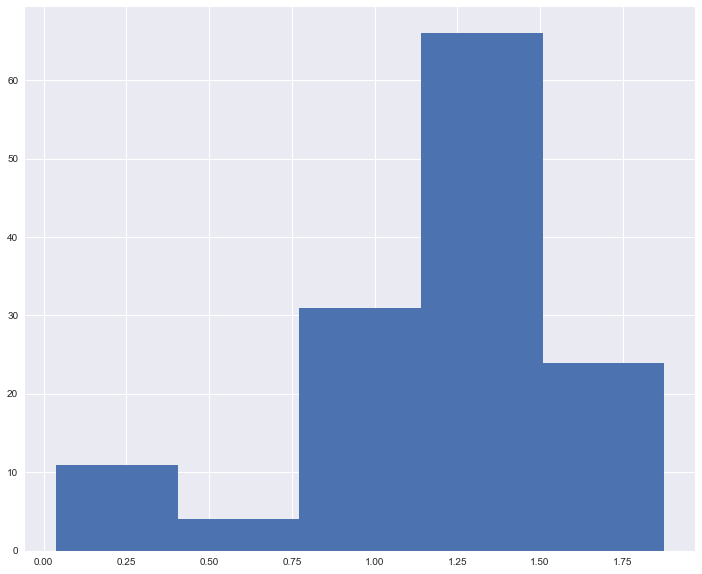

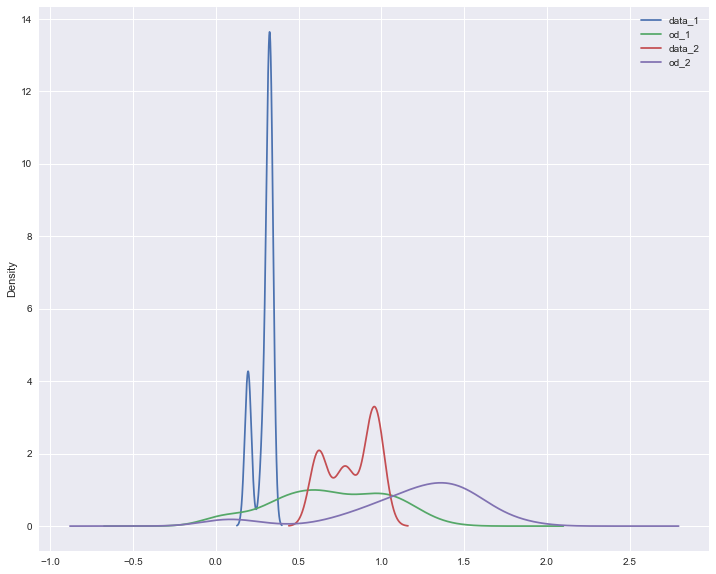

In [33]:
data['od_1'].hist(bins=5)
plt.show()
data['od_2'].hist(bins=5)
data.plot.kde()
#plt.vlines(2.83, 0, 1, colors='k', linestyles='solid', label='')
plt.show()

In [45]:
import numpy as np
data.fillna(data.mean(), inplace=True)

y = np.array(data.od_1)
x = np.array(data.od_2)


In [46]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.792


In [47]:
# calculate the Cohen's d between two samples
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(x,y)
print('Cohens d: %.3f' % d)

Cohens d: 1.319


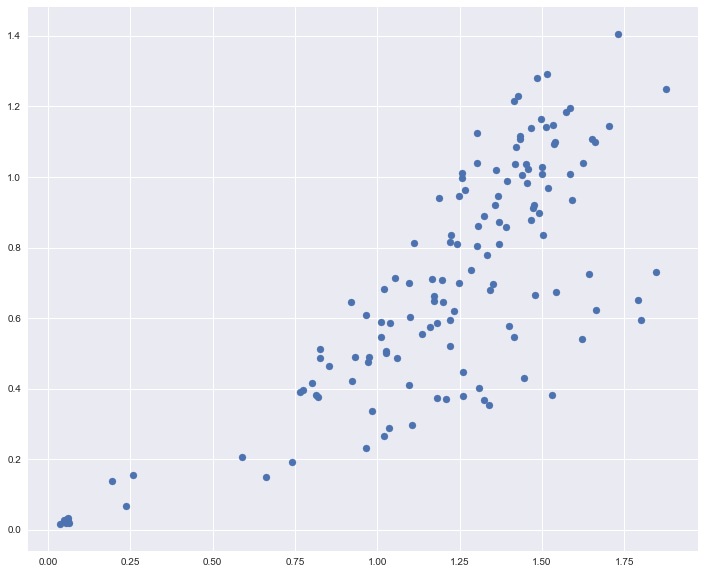

In [48]:
plt.scatter(x,y)
plt.show()

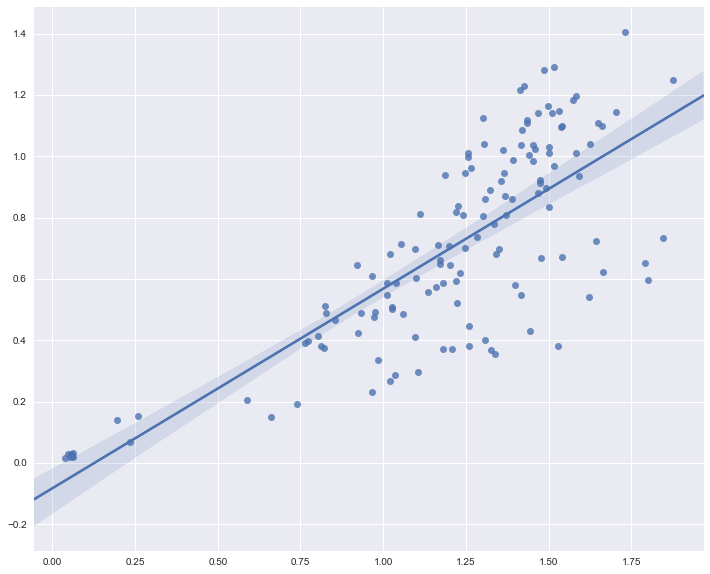

In [53]:
sns.regplot(x,y)

In [49]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

Cohen_d(x,y)

1.3234282225764449

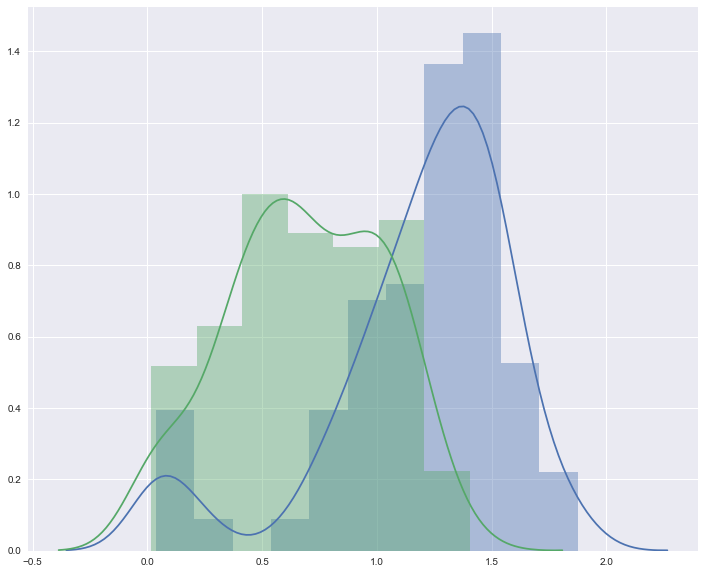

In [50]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(x) # Blue distribution
sns.distplot(y) # Green distribution

In [51]:
from scipy import stats
stats.ttest_ind(x,y)

Ttest_indResult(statistic=10.873072361161299, pvalue=4.4514658749801183e-23)

In [52]:
stats.ttest_rel(x,y)

Ttest_relResult(statistic=23.01141928354543, pvalue=1.4536953007311752e-48)